<a href="https://colab.research.google.com/github/guilhermecarva/guilhermecarva/blob/main/ML_Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("dataframe_exercicio_modulo_9.csv")
df

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,F,18,GT3,A,2,2,yes,no,no,no,no,no,4,3,4,6,6
1,F,17,GT3,T,1,2,no,yes,no,no,yes,no,5,3,3,4,6
2,F,15,LE3,T,1,2,yes,no,yes,no,yes,no,4,3,2,10,10
3,F,15,GT3,T,1,3,no,yes,yes,yes,yes,yes,3,2,2,2,15
4,F,16,GT3,T,1,2,no,yes,yes,no,no,no,4,3,2,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,F,19,GT3,T,1,3,no,no,no,yes,yes,no,5,4,2,4,10
1040,F,18,LE3,T,1,2,no,yes,no,no,yes,no,4,3,4,4,16
1041,F,18,GT3,T,2,2,no,no,no,yes,no,no,1,1,1,6,9
1042,M,17,LE3,T,2,1,no,no,no,no,yes,no,2,4,5,6,10


Atributos do dataset:
    
    1- 'sex': sexo
    
    2- 'age': idade
    
    3- 'famsize': tamanho da família; LE3 - famílias com no máximo 3 pessoas, GT3 caso contrário
    
    4- 'Pstatus': status de habitação com os pais; T - mora junto com os pais, A - mora separado;
    
    5- 'traveltime': tempo de viagem entre escola e casa;
        1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, or 4 - >1 hora
        
    6- 'studytime': tempo de estudo semanal; 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, ou 4 - >10 horas
    
    7- 'schoolsup': suporte educacional extra escola
    
    8- 'famsup': suporte educacional da família
    
    9- 'paid': pagou aulas particulares por fora
    
    10- 'activities': atividades extra-curriculares
    
    11- 'internet': acesso a internet em casa
    
    12- 'romantic': se está num relacionamento
    
    13- 'famrel': qualidade das relações familiares; 1 - muito ruim a 5 - muito boa
    
    14- 'freetime': tempo livre após escola; 1 - muito pouco até 5 - muito
    
    15- 'goout': relaciona-se com amigos; 1 - muito pouco até 5 - muito
    
    16- 'absences': quantidade de faltas na escola
    
    17- 'G3': nota média final no ensino médio
    
<br>

No dataset acima, faça uma __análise exploratória__ geral, bem como __pré-processamentos__ nas variáveis.

Considere a variável __'G3'__ como a __variável target__ do problema - contexto de __regressão.__

Teste __diferentes modelos de regressão__ a fim de explicar a variável target. Use a metodologia da __validação cruzada__ e o __coeficiente de determinação ($R^{2}$)__ como métrica de performance.

Plote __gráficos__ personalizados com os resultados.

__Análise Exploratória / preprocessamento__

In [ ]:
df.corr()['G3']

age          -0.125282
traveltime   -0.102627
studytime     0.161629
famrel        0.054461
freetime     -0.064890
goout        -0.097877
absences     -0.045671
G3            1.000000
Name: G3, dtype: float64

#### Nenhuma das variáveis numéricas possuem uma alta correlação com o target. Seja ela positiva ou negativa.
#### O tempo de estudo deveria ter uma alta correlação. No entanto, por estar, "categorizada" ou dividida em faixas, não nos dá um bom parâmetro em termos de correlação.

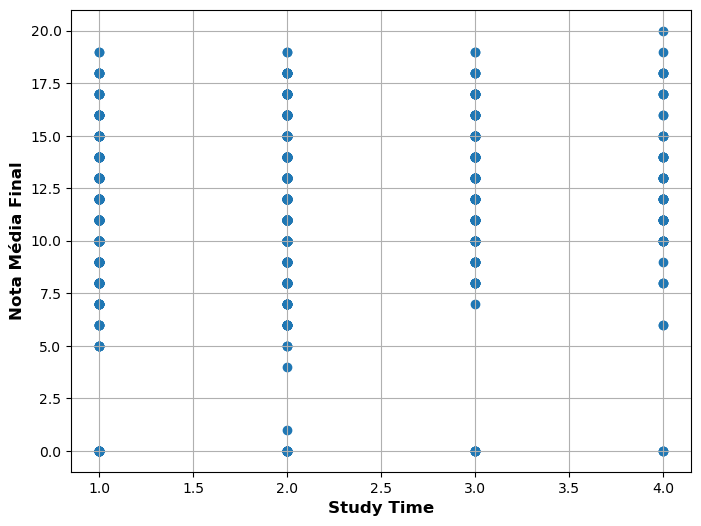

In [ ]:
plt.figure(figsize=[8,6])
plt.scatter(df.studytime, df.G3)
plt.xlabel("Study Time", fontsize = 12, fontweight = 'bold')
plt.ylabel("Nota Média Final", fontsize = 12, fontweight = 'bold')
plt.grid()
plt.show()

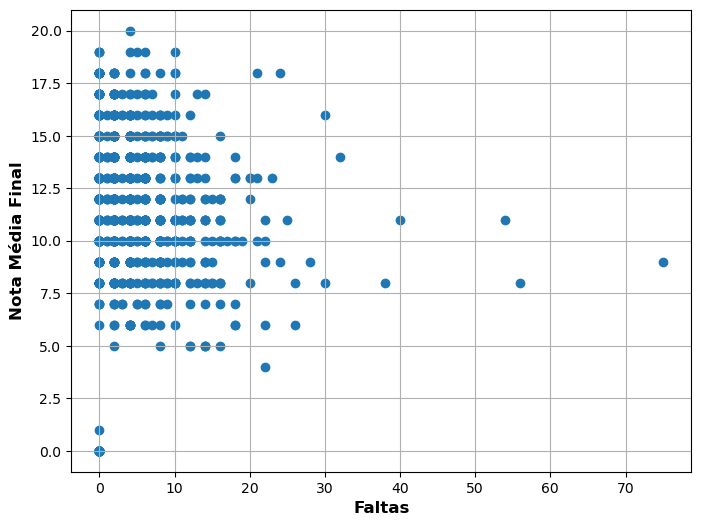

In [ ]:
plt.figure(figsize=[8,6])
plt.scatter(df.absences, df.G3)
plt.xlabel("Faltas", fontsize = 12, fontweight = 'bold')
plt.ylabel("Nota Média Final", fontsize = 12, fontweight = 'bold')
plt.grid()
plt.show()

In [ ]:
df.isnull().sum()

sex           0
age           0
famsize       0
Pstatus       0
traveltime    0
studytime     0
schoolsup     0
famsup        0
paid          0
activities    0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
absences      0
G3            0
dtype: int64

#### Não temos nenhum registro faltante no nosso DataSet

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
cat_encoder = OneHotEncoder()
sc = StandardScaler()

In [ ]:
dftrain, dftest = train_test_split(df, test_size = 0.25, random_state = 0)
print(df.shape)
print(dftrain.shape)
print(dftest.shape)

(1044, 17)
(783, 17)
(261, 17)


#### Vamos fazer o preprocessamento dos dados, normalizando as varíaveis numéricas e fazendo um encoder nas variáveis categóricas. Aplicaremos nos dados de treino e de teste.

In [ ]:
def preprocessamento_completo(df, dataset_de_treino = True, cat_encoder = None, std_scaler = None):

    dff = df.copy()

    variaveis_para_normalizar = ['age',
                                 'traveltime',
                                 'studytime',
                                 'famrel',
                                 'freetime',
                                 'goout',
                                 'absences']

    variaveis_encoder = ['sex',
                         'famsize',
                         'Pstatus',
                         'schoolsup',
                         'famsup',
                         'paid',
                         'activities',
                         'internet',
                         'romantic']

    if dataset_de_treino:

        #OHE
        encoder = OneHotEncoder()
        df_OHE = encoder.fit_transform(dff[variaveis_encoder]).toarray()

        #normalização
        sc = StandardScaler()
        variaveis_norm = sc.fit_transform(dff[variaveis_para_normalizar])

        X, y =  np.c_[df_OHE, variaveis_norm], dff.G3.values
        return X, y, encoder, sc

    else:
        #OHE
        df_OHE = cat_encoder.transform(dff[variaveis_encoder]).toarray()

        #normalização
        variaveis_norm = std_scaler.transform(dff[variaveis_para_normalizar])

        X, y =  np.c_[df_OHE, variaveis_norm], dff.G3.values
        return X, y

In [ ]:
Xtrain, ytrain, encoder_train, scaler_train  = preprocessamento_completo(df = dftrain,
                                                                         dataset_de_treino = True,
                                                                         cat_encoder = None,
                                                                         std_scaler = None)

In [ ]:
Xtrain.shape, ytrain.shape, dftrain.shape

((783, 25), (783,), (783, 17))

In [ ]:
Xtest, ytest = preprocessamento_completo(df = dftest,
                                         dataset_de_treino = False,
                                         cat_encoder = encoder_train,
                                         std_scaler = scaler_train)

In [ ]:
Xtest.shape, ytest.shape, dftest.shape

((261, 25), (261,), (261, 17))

__ML__

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
def RMSE(ytrue, ypred):
    return np.sqrt(mean_squared_error(y_true = ytrue, y_pred = ypred))

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(Xtrain, ytrain)

LinearRegression()

In [ ]:
RMSE(ytrue = ytrain, ypred = lin_reg.predict(Xtrain))

3.834294158226563

In [ ]:
r2_score(y_true=ytrain, y_pred=lin_reg.predict(Xtrain))

0.10041129103753521

In [ ]:
num_vizinhos = [1, 2, 5, 10, 20, 50]

for n in num_vizinhos:
    knn = KNeighborsRegressor(n_neighbors = n)
    knn.fit(Xtrain, ytrain)

    preds = knn.predict(Xtrain)

    rmse_train = RMSE(ytrue = ytrain, ypred = preds)
    r2_train = r2_score(y_true = ytrain, y_pred = preds)

    print("K = " + str(n) + " | RMSE:" + str(np.round(rmse_train,2)) + " / R2: "+ str(np.round(r2_train, 2)))

K = 1 | RMSE:1.01 / R2: 0.94
K = 2 | RMSE:2.71 / R2: 0.55
K = 5 | RMSE:3.35 / R2: 0.31
K = 10 | RMSE:3.6 / R2: 0.21
K = 20 | RMSE:3.74 / R2: 0.14
K = 50 | RMSE:3.85 / R2: 0.09


In [ ]:
max_profundidades = [1, 5, 10, 100]

for m in max_profundidades:
    dt = DecisionTreeRegressor(max_depth = m)
    dt.fit(Xtrain, ytrain)

    preds = dt.predict(Xtrain)

    rmse_train = RMSE(ytrue = ytrain, ypred = preds)
    r2_train = r2_score(y_true = ytrain, y_pred = preds)

    print("Profundidade da árvore = " + str(m) + " | RMSE:" + str(np.round(rmse_train,2)) + " / R2: "+ str(np.round(r2_train, 2)))

Profundidade da árvore = 1 | RMSE:4.0 / R2: 0.02
Profundidade da árvore = 5 | RMSE:3.62 / R2: 0.2
Profundidade da árvore = 10 | RMSE:2.28 / R2: 0.68
Profundidade da árvore = 100 | RMSE:0.72 / R2: 0.97


#### Ambos modelos obtiveram um R2 score muito próximo de 1.0 (indicando um possível overfitting) , no entanto o RMSE não se aproximou tanto do ZERO. Vamos fazer uma validação cruzada para regressão linear e KNN com diferentes vizinhos e utilizar o R2 como métrica de performance.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_lin_reg = cross_val_score(estimator = LinearRegression(),
                             X = Xtrain,
                             y = ytrain,
                             cv = 5,
                             scoring = 'r2')
print(cv_lin_reg)
print('media: ', cv_lin_reg.mean())
print('desvio padrão: ', cv_lin_reg.std())

[0.02937724 0.07768198 0.0876458  0.02641017 0.06464084]
media:  0.057151206630057794
desvio padrão:  0.024995730482787172


In [ ]:
def cross_validation_R2_results(modelo, nome_modelo, X, y, num_folds):
    cv_results = cross_val_score(estimator = modelo,
                                 X = Xtrain,
                                 y = ytrain,
                                 cv = num_folds,
                                 scoring = 'r2')
    modelo.fit(Xtrain, ytrain)
    r2_train = r2_score(y_true=ytrain, y_pred=modelo.predict(Xtrain))
    plt.figure(figsize=[8,6])
    plt.scatter(range(1, 1+num_folds), cv_results, c = 'blue', s = 100)
    plt.plot(range(1, 1+num_folds), cv_results, c = 'blue', lw = 2, label = 'R2 Fold')
    plt.xticks(range(1, 1+num_folds))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.plot(range(1, 1+num_folds), [cv_results.mean()] * num_folds, c = 'red', lw = 2, label = 'R2 Cross-val Médio')


    plt.plot(range(1, 1+num_folds), [cv_results.mean() + cv_results.std()] * num_folds, '--',
             c = 'gray', lw = 2, label = '+1 desv. padrão margem')
    plt.plot(range(1, 1+num_folds), [cv_results.mean() - cv_results.std()] * num_folds, '--',
             c = 'gray', lw = 2, label = '-1 desv. padrão margem')

    plt.plot(range(1, 1+num_folds), [r2_train] * num_folds, '--' ,c = 'black', lw = 3, label = 'R2 Treino')
    plt.legend(fontsize = 10, bbox_to_anchor = [1.4,1.])
    plt.ylim([0,1.05])
    plt.grid()
    plt.ylabel("R2 Score", fontsize = 14, fontweight = 'bold')
    plt.xlabel("Folds", fontsize = 14, fontweight = 'bold')
    plt.title(nome_modelo + " | R2 TREINO/VAL: "+ str(np.round(r2_train,2)) +" / "+ str(np.round(cv_results.mean(),2)),
              fontsize = 14, fontweight = 'bold')
    plt.show()

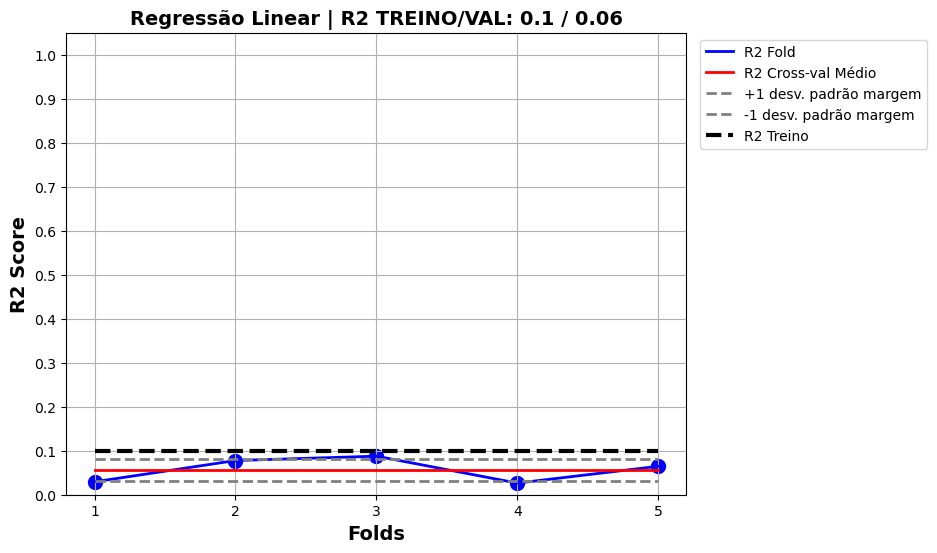

In [ ]:
cross_validation_R2_results(modelo = LinearRegression(),
                           nome_modelo = 'Regressão Linear',
                           X = Xtrain,
                           y = ytrain,
                           num_folds = 5)

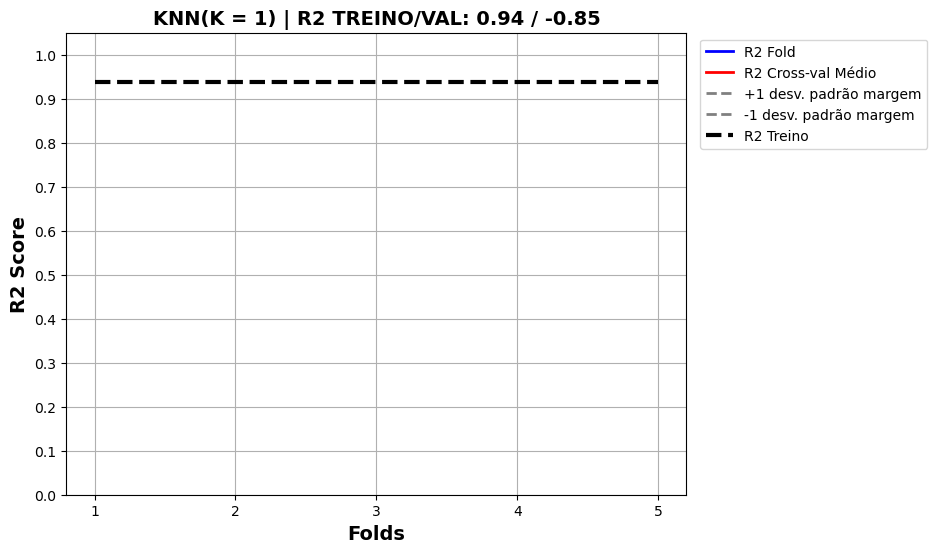

In [ ]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 1),
                           nome_modelo = 'KNN(K = 1)',
                           X = Xtrain,
                           y = ytrain,
                           num_folds = 5)

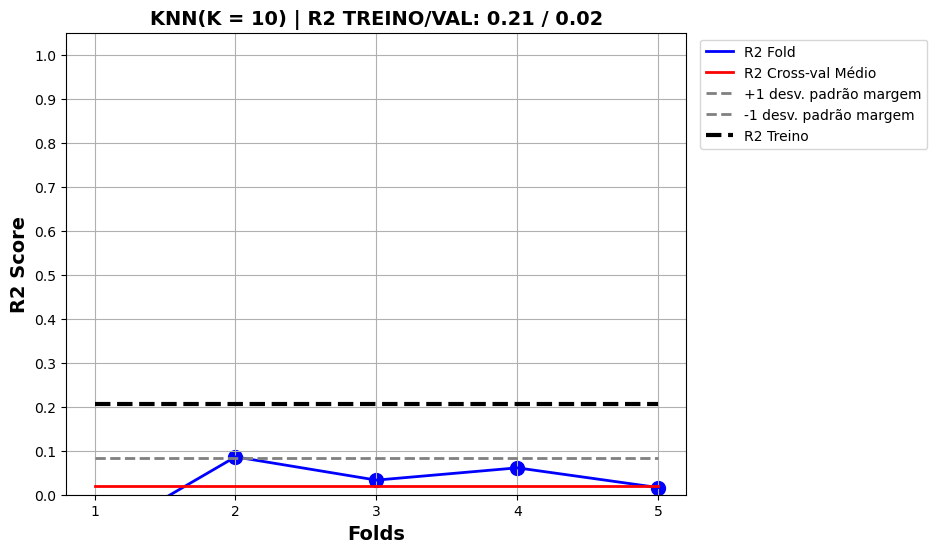

In [ ]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 10),
                           nome_modelo = 'KNN(K = 10)',
                           X = Xtrain,
                           y = ytrain,
                           num_folds = 5)

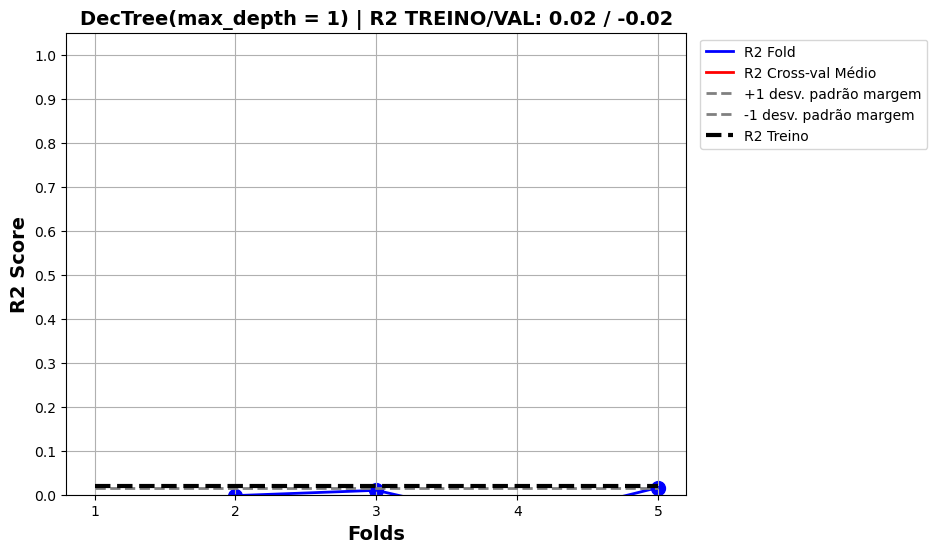

In [ ]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 1),
                           nome_modelo = 'DecTree(max_depth = 1)',
                           X = Xtrain,
                           y = ytrain,
                           num_folds = 5)

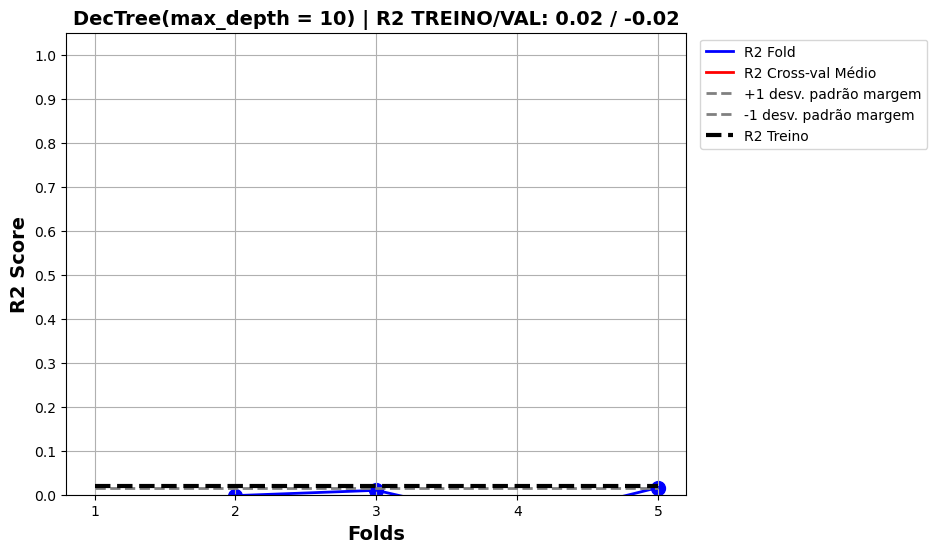

In [ ]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 1),
                           nome_modelo = 'DecTree(max_depth = 10)',
                           X = Xtrain,
                           y = ytrain,
                           num_folds = 5)

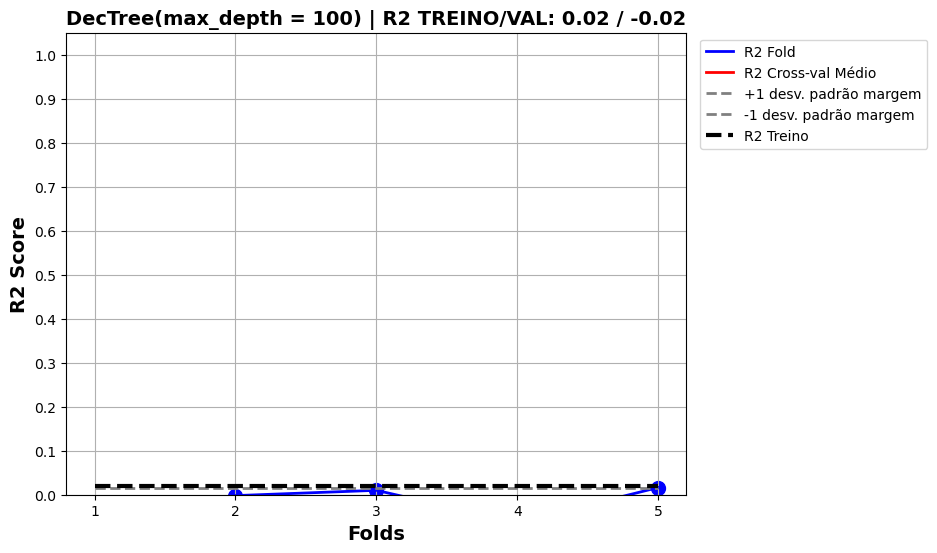

In [ ]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 1),
                           nome_modelo = 'DecTree(max_depth = 100)',
                           X = Xtrain,
                           y = ytrain,
                           num_folds = 5)

### Dos resultados acima podemos inferir que o modelo LinearRegression obteve uma melhor performance em relação ao KNN ( que em algumas instâncias estava overfittando)